In [9]:
# Import required libraries

# Data Manipulation & Visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Feature Selection
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [10]:
def impute_scale(X_train, X_test):
    # Separate the numerical and categorical features
    numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=object).columns.tolist()

    # Perform preprocessing for numerical features
    imputer_num = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train[numerical_features] = imputer_num.fit_transform(X_train[numerical_features])
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = imputer_num.transform(X_test[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    return X_train, X_test

def impute_one_hot_encode(X_train, X_test):
    numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=object).columns.tolist()
    # One-hot encoding for categorical features

    # Identify categorical features

    # Impute missing values in categorical features
    imputer_cat = SimpleImputer(strategy='most_frequent')

    X_train[categorical_features] = imputer_cat.fit_transform(X_train[categorical_features])
    X_test[categorical_features] = imputer_cat.transform(X_test[categorical_features])

    # One-hot encoding
    onehot = OneHotEncoder(handle_unknown='ignore')

    X_train_onehot = onehot.fit_transform(X_train[categorical_features]).toarray()
    X_test_onehot = onehot.transform(X_test[categorical_features]).toarray()

    # Get the names of the encoded columns
    encoded_feature_names = onehot.get_feature_names_out(categorical_features)

    # Put transformed data back into DataFrames
    X_train_onehot = pd.DataFrame(X_train_onehot, columns=encoded_feature_names)
    X_test_onehot = pd.DataFrame(X_test_onehot, columns=encoded_feature_names)

    print(X_train_onehot.head())

    X_train.reset_index(inplace=True)
    X_test.reset_index(inplace=True)

    # Concatenate the encoded features with the continuous features
    X_train = pd.concat([X_train[numerical_features], X_train_onehot], axis=1)
    X_test = pd.concat([X_test[numerical_features], X_test_onehot], axis=1)
    return X_train, X_test




In [11]:

def models(X_train, X_test, y_train, y_test):

    # 1. Logistic Regression

    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print("Logistic Regression: ", accuracy_score(y_test, y_pred))
    print("Logistic Regression: \n", confusion_matrix(y_test, y_pred))
    print("Logistic Regression: \n", classification_report(y_test, y_pred))
    f1scorelr = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Logistic Regression Model is", f1scorelr)


    # 2. Decision Tree Classifier

    # Create an instance
    classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                           sampling_strategy='not majority',
                                           replacement=False,
                                           random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Decision Tree Classifier: ", accuracy_score(y_test, y_pred))
    print("Decision Tree Classifier: \n", confusion_matrix(y_test, y_pred))
    print("Decision Tree Classifier: \n", classification_report(y_test, y_pred))
    f1scoreknn = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Decision Tree Classifier Model is", f1scoreknn)

    # 3. KNN

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN: ", accuracy_score(y_test, y_pred))
    print("KNN: \n", confusion_matrix(y_test, y_pred))
    print("KNN: \n", classification_report(y_test, y_pred))
    f1scoreknn = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of KNN Model is", f1scoreknn)

    # # 4. SVC
    #
    # classifier = SVC(kernel='rbf', random_state=0)
    # classifier.fit(X_train, y_train)
    # y_pred = classifier.predict(X_test)
    # print("SVM: ", accuracy_score(y_pred, y_test))
    # print("SVM: \n", confusion_matrix(y_pred, y_test))
    # print("SVM: \n", classification_report(y_pred, y_test))
    # f1scoresvm = f1_score(y_test, y_pred, average='weighted')
    # print(" F1 Score of SVM Model is", f1scoresvm)


    # 5. Decision Tree Classifier

    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Decision Tree: ", accuracy_score(y_pred, y_test))
    print("Decision Tree: \n", confusion_matrix(y_pred, y_test))
    print("Decision Tree: \n", classification_report(y_pred, y_test))
    f1scoredt = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Decision Tree Model is", f1scoredt)

    # 6. Random Forest Classifier

    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Random Forest: ", accuracy_score(y_test, y_pred))
    print("Random Forest: \n", confusion_matrix(y_test, y_pred))
    print("Random Forest: \n", classification_report(y_test, y_pred))
    f1scorerf = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Decision Tree Model is", f1scorerf)


    # 7. Gaussian

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Gaussian NB: ", accuracy_score(y_test, y_pred))
    print("Gaussian NB: \n", confusion_matrix(y_test, y_pred))
    print("Gaussian NB: \n", classification_report(y_test, y_pred))
    f1scoregn = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Gaussian NB Model is", f1scoregn)


    # 8. Ridge Classifier

    classifier = RidgeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("RidgeClassifier: ", accuracy_score(y_test, y_pred))
    print("RidgeClassifier: \n", confusion_matrix(y_test, y_pred))
    print("RidgeClassifier: \n", classification_report(y_test, y_pred))
    f1scorerc = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of Ridge Regression Model is", f1scorerc)

    # 9. MLP Classifier


    classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                               solver='sgd', verbose=10, random_state=42,
                               learning_rate_init=.1)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("MLPClassifier: ", accuracy_score(y_test, y_pred))
    print("MLPClassifier: \n", confusion_matrix(y_test, y_pred))
    print("MLPlassifier: \n", classification_report(y_test, y_pred))
    f1scoremlp = f1_score(y_test, y_pred, average='weighted')
    print(" F1 Score of MLP Model is", f1scoremlp)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindDir9am     134894 non-null  object 
 6   WindDir3pm     141232 non-null  object 
 7   WindSpeed9am   143693 non-null  float64
 8   WindSpeed3pm   142398 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  RainToday      142199 non-null  object 
 14  RainTomorrow   142193 non-null  object 
dtypes: float64(10), object(5)
memory usage: 16.6+ MB


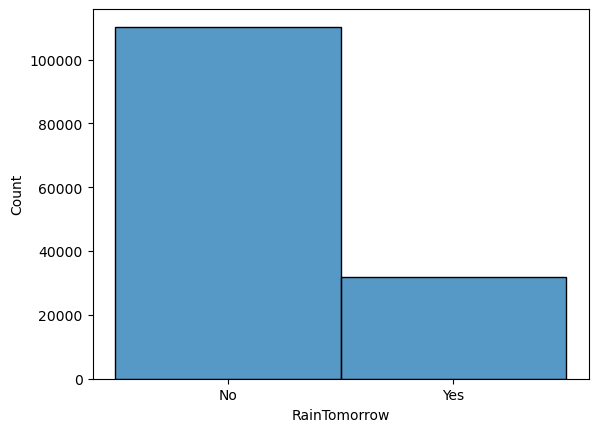

In [12]:

# import warnings
# warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Drop columns that are not required
df = df.drop(['Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1)
df.info()
# Remove rows with missing values in the target variable
df = df.dropna(subset=['RainTomorrow'])

# Split the dataset into features and target variable
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

sns.histplot(df['RainTomorrow'])
plt.show()

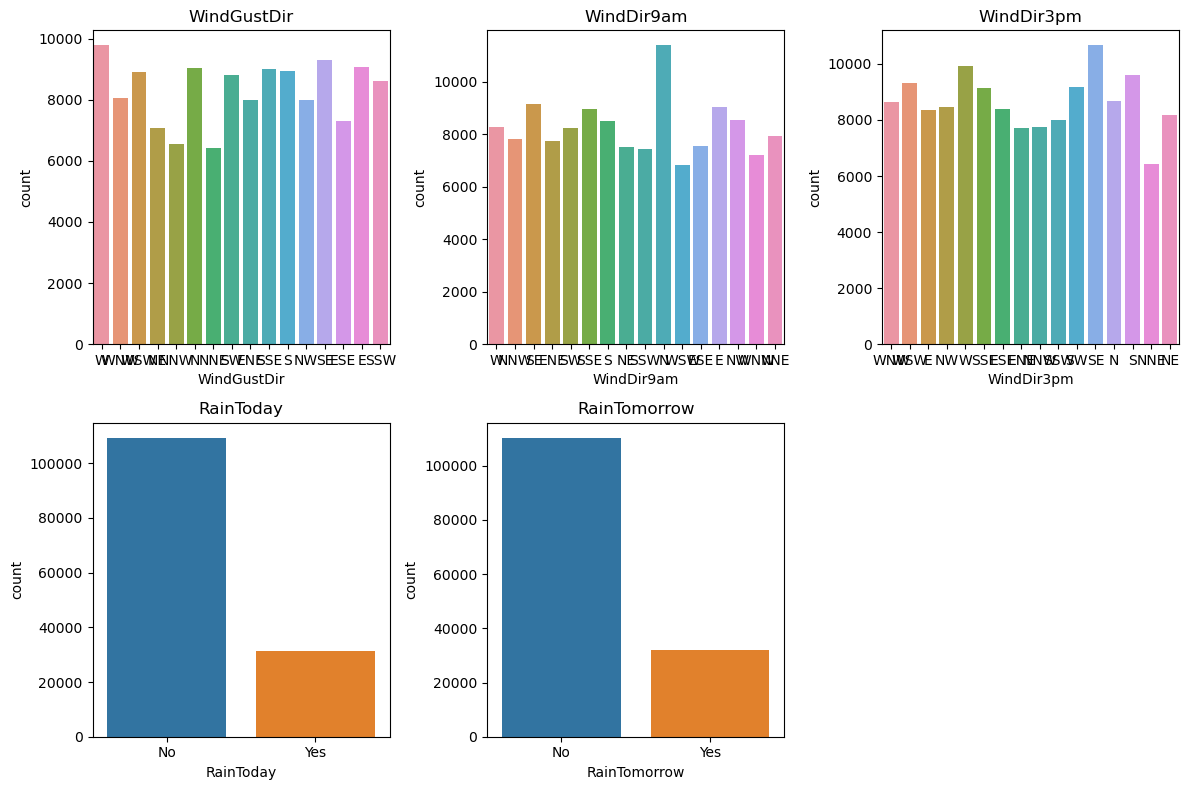

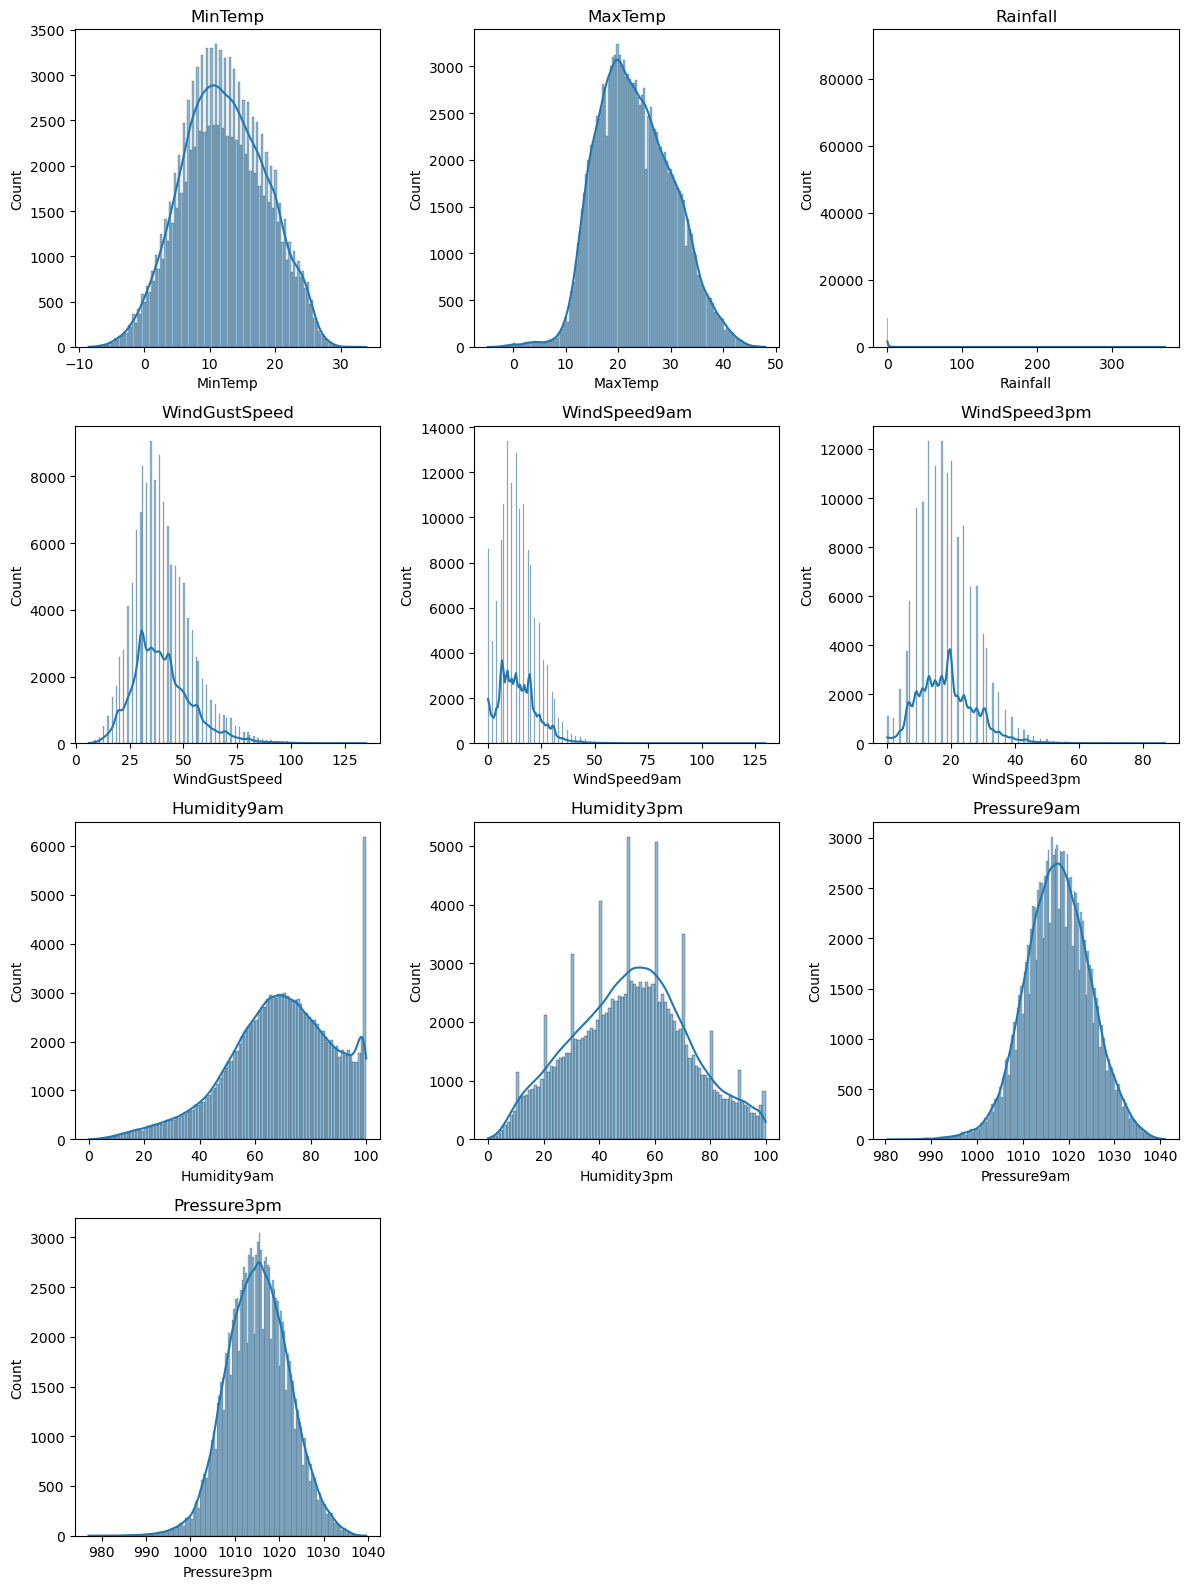

In [13]:
# Separate categorical and discrete data
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
disc_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot categorical data
n_rows = (len(cat_cols) // 3) + (len(cat_cols) % 3 > 0) # Calculate number of subplot rows
plt.figure(figsize=(12, n_rows*4))
for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot discrete data
n_rows = (len(disc_cols) // 3) + (len(disc_cols) % 3 > 0) # Calculate number of subplot rows
plt.figure(figsize=(12, n_rows*4))
for i, col in enumerate(disc_cols):
    plt.subplot(n_rows, 3, i+1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

# # Impute & scale
X_train, X_test = impute_scale(X_train, X_test)
# One-hot encoding for categorical features
X_train, X_test = impute_one_hot_encode(X_train, X_test)

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

# 1 Call model here
models(X_train, X_test, y_train, y_test)

(113754, 14)
(113754,)
   WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N   
0            0.0              0.0              0.0            0.0  \
1            0.0              0.0              0.0            0.0   
2            0.0              1.0              0.0            0.0   
3            0.0              0.0              0.0            0.0   
4            0.0              0.0              0.0            0.0   

   WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW   
0             0.0              0.0              0.0             0.0  \
1             0.0              0.0              0.0             0.0   
2             0.0              0.0              0.0             0.0   
3             0.0              0.0              0.0             0.0   
4             0.0              0.0              0.0             0.0   

   WindGustDir_S  WindGustDir_SE  ...  WindDir3pm_S  WindDir3pm_SE   
0            0.0             0.0  ...           0.0            0.

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Decision Tree Classifier:  0.8361756742501495
Decision Tree Classifier: 
 [[20841  1257]
 [ 3402  2939]]
Decision Tree Classifier: 
               precision    recall  f1-score   support

          No       0.86      0.94      0.90     22098
         Yes       0.70      0.46      0.56      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.82      0.84      0.82     28439

 F1 Score of Decision Tree Classifier Model is 0.8232924413717716
KNN:  0.8260838988712683
KNN: 
 [[20667  1431]
 [ 3515  2826]]
KNN: 
               precision    recall  f1-score   support

          No       0.85      0.94      0.89     22098
         Yes       0.66      0.45      0.53      6341

    accuracy                           0.83     28439
   macro avg       0.76      0.69      0.71     28439
weighted avg       0.81      0.83      0.81     28439

 F1 Score of KNN Model is 0.8129001344774073
Decision Tree:  0.78227082527515

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPlassifier: 
               precision    recall  f1-score   support

          No       0.87      0.94      0.90     22098
         Yes       0.71      0.53      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

 F1 Score of MLP Model is 0.8386550014605405


In [15]:
# Feature Selection
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)

features = X_train.columns[(sel.get_support())]
print(len(features))
print(features)

X_train_up = X_train.filter(items=features)
X_test_up = X_test.filter(items=features)

# 2 Call model here
models(X_train_up, X_test_up, y_train, y_test)



12
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday_No', 'RainToday_Yes'],
      dtype='object')
Logistic Regression:  0.8356833925243503
Logistic Regression: 
 [[20827  1271]
 [ 3402  2939]]
Logistic Regression: 
               precision    recall  f1-score   support

          No       0.86      0.94      0.90     22098
         Yes       0.70      0.46      0.56      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.82      0.84      0.82     28439

 F1 Score of Logistic Regression Model is 0.8228689742638502


/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Decision Tree Classifier:  0.834980132916066
Decision Tree Classifier: 
 [[20774  1324]
 [ 3369  2972]]
Decision Tree Classifier: 
               precision    recall  f1-score   support

          No       0.86      0.94      0.90     22098
         Yes       0.69      0.47      0.56      6341

    accuracy                           0.83     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.82      0.83      0.82     28439

 F1 Score of Decision Tree Classifier Model is 0.8227663002619288
KNN:  0.8273849291465944
KNN: 
 [[20487  1611]
 [ 3298  3043]]
KNN: 
               precision    recall  f1-score   support

          No       0.86      0.93      0.89     22098
         Yes       0.65      0.48      0.55      6341

    accuracy                           0.83     28439
   macro avg       0.76      0.70      0.72     28439
weighted avg       0.82      0.83      0.82     28439

 F1 Score of KNN Model is 0.8173157786542231
Decision Tree:  0.776328281585147

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier:  0.845529027040332
MLPClassifier: 
 [[21082  1016]
 [ 3377  2964]]
MLPlassifier: 
               precision    recall  f1-score   support

          No       0.86      0.95      0.91     22098
         Yes       0.74      0.47      0.57      6341

    accuracy                           0.85     28439
   macro avg       0.80      0.71      0.74     28439
weighted avg       0.84      0.85      0.83     28439

 F1 Score of MLP Model is 0.831777644659979


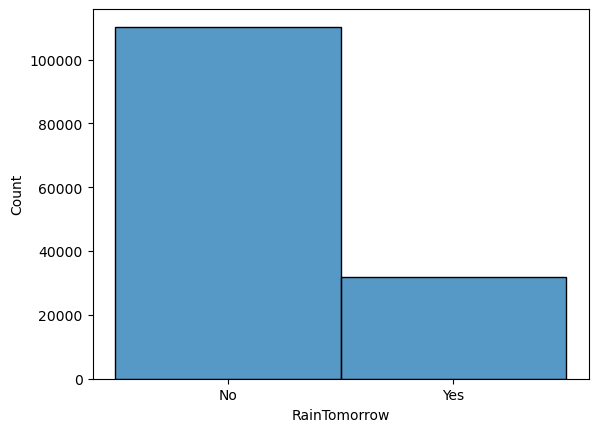

In [16]:
sns.histplot(df['RainTomorrow'])
plt.show()

        MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am   
0          13.4     22.9       0.6           W           44.0          W  \
1           7.4     25.1       0.0         WNW           44.0        NNW   
2          12.9     25.7       0.0         WSW           46.0          W   
3           9.2     28.0       0.0          NE           24.0         SE   
4          17.5     32.3       1.0           W           41.0        ENE   
...         ...      ...       ...         ...            ...        ...   
145454      3.5     21.8       0.0           E           31.0        ESE   
145455      2.8     23.4       0.0           E           31.0         SE   
145456      3.6     25.3       0.0         NNW           22.0         SE   
145457      5.4     26.9       0.0           N           37.0         SE   
145458      7.8     27.0       0.0          SE           28.0        SSE   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm   
0           

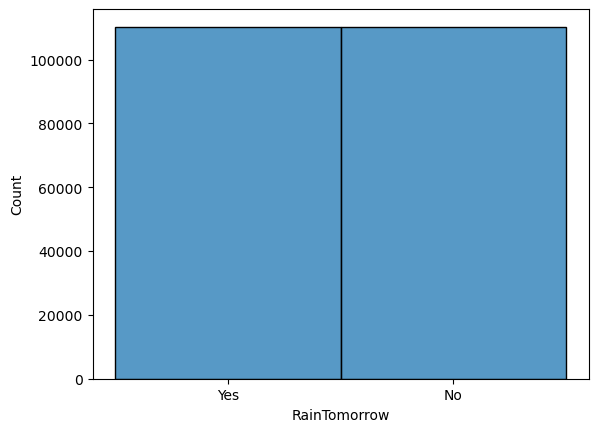

   WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N   
0            0.0              0.0              0.0            0.0  \
1            0.0              0.0              0.0            0.0   
2            0.0              0.0              0.0            0.0   
3            0.0              0.0              0.0            0.0   
4            0.0              0.0              1.0            0.0   

   WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW   
0             0.0              0.0              0.0             0.0  \
1             0.0              0.0              0.0             1.0   
2             0.0              0.0              0.0             1.0   
3             0.0              0.0              1.0             0.0   
4             0.0              0.0              0.0             0.0   

   WindGustDir_S  WindGustDir_SE  ...  WindDir3pm_S  WindDir3pm_SE   
0            0.0             1.0  ...           0.0            0.0  \
1            0.0  

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Decision Tree Classifier:  0.9360935481677884
Decision Tree Classifier: 
 [[20124  2043]
 [  777 21183]]
Decision Tree Classifier: 
               precision    recall  f1-score   support

          No       0.96      0.91      0.93     22167
         Yes       0.91      0.96      0.94     21960

    accuracy                           0.94     44127
   macro avg       0.94      0.94      0.94     44127
weighted avg       0.94      0.94      0.94     44127

 F1 Score of Decision Tree Classifier Model is 0.9360495215048197
KNN:  0.8219684093638815
KNN: 
 [[16988  5179]
 [ 2677 19283]]
KNN: 
               precision    recall  f1-score   support

          No       0.86      0.77      0.81     22167
         Yes       0.79      0.88      0.83     21960

    accuracy                           0.82     44127
   macro avg       0.83      0.82      0.82     44127
weighted avg       0.83      0.82      0.82     44127

 F1 Score of KNN Model is 0.8214419866845671
Decision Tree:  0.90697305504566

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: 
 [[16993  5174]
 [ 3494 18466]]
MLPlassifier: 
               precision    recall  f1-score   support

          No       0.83      0.77      0.80     22167
         Yes       0.78      0.84      0.81     21960

    accuracy                           0.80     44127
   macro avg       0.81      0.80      0.80     44127
weighted avg       0.81      0.80      0.80     44127

 F1 Score of MLP Model is 0.8033170566110523


In [17]:

# # UPSAMPLING

local_df = df.copy(deep=True)

print(local_df)

# create two different dataframe of majority and minority class
df_majority = local_df[(local_df['RainTomorrow'] == "No")]
df_minority = local_df[(local_df['RainTomorrow'] == "Yes")]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=110316,  # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

sns.histplot(df_upsampled['RainTomorrow'])
plt.show()

X = df_upsampled.drop('RainTomorrow', axis=1)
y = df_upsampled['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Impute & scale
X_train, X_test = impute_scale(X_train, X_test)
# One-hot encoding for categorical features
X_train, X_test = impute_one_hot_encode(X_train, X_test)

# 3 Call model here
models(X_train, X_test, y_train, y_test)


In [18]:
# # SMOTE

sm_df = df.copy(deep=True)

X = sm_df.drop('RainTomorrow', axis=1)
y = sm_df['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Impute & scale
X_train, X_test = impute_scale(X_train, X_test)
# One-hot encoding for categorical features
X_train, X_test = impute_one_hot_encode(X_train, X_test)

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit and resample the data
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

# 4 Call model here
models(X_train, X_test, y_train, y_test)


   WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N   
0            0.0              0.0              0.0            0.0  \
1            0.0              0.0              0.0            0.0   
2            0.0              1.0              0.0            0.0   
3            0.0              0.0              0.0            0.0   
4            0.0              0.0              0.0            0.0   

   WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW   
0             0.0              0.0              0.0             0.0  \
1             0.0              0.0              0.0             0.0   
2             0.0              0.0              0.0             0.0   
3             0.0              0.0              0.0             0.0   
4             0.0              0.0              0.0             0.0   

   WindGustDir_S  WindGustDir_SE  ...  WindDir3pm_S  WindDir3pm_SE   
0            0.0             0.0  ...           0.0            0.0  \
1            0.0  

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Decision Tree Classifier:  0.8373155941714182
Decision Tree Classifier: 
 [[20017  2081]
 [ 5109 16989]]
Decision Tree Classifier: 
               precision    recall  f1-score   support

          No       0.80      0.91      0.85     22098
         Yes       0.89      0.77      0.83     22098

    accuracy                           0.84     44196
   macro avg       0.84      0.84      0.84     44196
weighted avg       0.84      0.84      0.84     44196

 F1 Score of Decision Tree Classifier Model is 0.8365483472967133
KNN:  0.7421259842519685
KNN: 
 [[16430  5668]
 [ 5729 16369]]
KNN: 
               precision    recall  f1-score   support

          No       0.74      0.74      0.74     22098
         Yes       0.74      0.74      0.74     22098

    accuracy                           0.74     44196
   macro avg       0.74      0.74      0.74     44196
weighted avg       0.74      0.74      0.74     44196

 F1 Score of KNN Model is 0.7421254930024352
Decision Tree:  0.79518508462304

/Users/tanmaykshirsagar/opt/anaconda3/envs/tsm_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: 
 [[18791  3307]
 [ 5012 17086]]
MLPlassifier: 
               precision    recall  f1-score   support

          No       0.79      0.85      0.82     22098
         Yes       0.84      0.77      0.80     22098

    accuracy                           0.81     44196
   macro avg       0.81      0.81      0.81     44196
weighted avg       0.81      0.81      0.81     44196

 F1 Score of MLP Model is 0.8114897410746893
